In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from glob import glob
from PIL import Image, ImageEnhance,ImageFilter
from tqdm import tqdm

           Le but de ce programme est d'évaluer les performances du système de recherche par contenu.

Dans notre base de données<strong><ins>“HAM_100000’’</ins></strong>, on a travaillé avec un fichier csv qui rassemble toutes les données dans des colonnes : 

i.	 Lire le contenu du fichier

In [6]:
skin_df=pd.read_csv('HAM10000_metadata (1).csv')
skin_df

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


 Alors ce qui nous intéresse  est :<br>
 <ul>
   	           <li style='color:blue;'><strong>a. ‘’ image_id ‘’ qui désigne le nom de l’image.</li></strong><br>
	           <li style='color:blue;'> <strong>b. ‘’ dx ‘’qui désigne le nom de la classe correspondante à l’image.</strong></li>
<ul>


on va ajouter à la suite des colonnes <strong>'path'</strong> et <strong>'image'</strong> :

In [7]:
image_path={}
for x in glob(os.path.join(r'C:\Users\wissal\OneDrive\Documents\BBM\archive (5)','*','*.jpg')):
    image_path[os.path.splitext(os.path.basename('{}'.format(x)))[0]]=x
skin_df=pd.read_csv('HAM10000_metadata (1).csv')
skin_df['path']=skin_df['image_id'].map(image_path.get)
skin_df['image']= skin_df['path'].map(
    lambda x: np.asarray(
        Image.open(x).resize((230, 240)).filter(ImageFilter.FIND_EDGES)
          
    ) 
)
skin_df=skin_df.sort_values('dx',ascending='true')
skin_df #afficher le fichier csv avec les données insérées

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,image
9803,HAM_0004722,ISIC_0024575,akiec,histo,70.0,female,upper extremity,C:\Users\wissal\OneDrive\Documents\BBM\archive...,"[[[180, 119, 101], [184, 124, 110], [186, 133,..."
9789,HAM_0003136,ISIC_0026645,akiec,histo,65.0,male,back,C:\Users\wissal\OneDrive\Documents\BBM\archive...,"[[[149, 106, 88], [148, 108, 94], [153, 116, 1..."
9790,HAM_0004609,ISIC_0024710,akiec,histo,75.0,male,back,C:\Users\wissal\OneDrive\Documents\BBM\archive...,"[[[212, 195, 210], [213, 196, 210], [215, 196,..."
9791,HAM_0004780,ISIC_0029315,akiec,histo,75.0,male,lower extremity,C:\Users\wissal\OneDrive\Documents\BBM\archive...,"[[[177, 149, 148], [177, 150, 150], [175, 152,..."
9792,HAM_0003157,ISIC_0029811,akiec,histo,65.0,male,upper extremity,C:\Users\wissal\OneDrive\Documents\BBM\archive...,"[[[200, 150, 164], [200, 152, 165], [199, 150,..."
...,...,...,...,...,...,...,...,...,...
2412,HAM_0000934,ISIC_0031706,vasc,consensus,60.0,male,trunk,C:\Users\wissal\OneDrive\Documents\BBM\archive...,"[[[237, 169, 178], [235, 168, 176], [236, 169,..."
2411,HAM_0007372,ISIC_0030283,vasc,consensus,55.0,male,trunk,C:\Users\wissal\OneDrive\Documents\BBM\archive...,"[[[222, 166, 168], [219, 166, 167], [219, 160,..."
2410,HAM_0004549,ISIC_0031201,vasc,consensus,45.0,male,trunk,C:\Users\wissal\OneDrive\Documents\BBM\archive...,"[[[228, 193, 191], [229, 194, 190], [225, 193,..."
2417,HAM_0001238,ISIC_0032409,vasc,consensus,80.0,male,abdomen,C:\Users\wissal\OneDrive\Documents\BBM\archive...,"[[[230, 168, 175], [230, 168, 175], [228, 164,..."


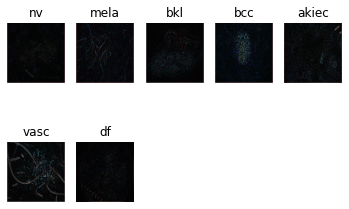

In [47]:
from PIL import ImageFilter
Im=np.asarray(skin_df['image'][9865])
plt.subplot(2,5,1)
plt.axis('off')
plt.title('nv')
plt.imshow(Im)
plt.subplot(2,5,2)
Im1=np.asarray(skin_df['image'][3145])
plt.axis('off')
plt.title('mela')
plt.imshow(Im1)
plt.subplot(2,5,3)
Im2=np.asarray(skin_df['image'][1920])
plt.axis('off')
plt.title('bkl')
plt.imshow(Im2)
plt.subplot(2,5,4)
Im3=np.asarray(skin_df['image'][834])
plt.axis('off')
plt.title('bcc')
plt.imshow(Im3)
plt.subplot(2,5,5)
Im4=np.asarray(skin_df['image'][324])
plt.axis('off')
plt.title('akiec')
plt.imshow(Im4)
plt.subplot(2,5,6)
Im5=np.asarray(skin_df['image'][10010])
plt.axis('off')
plt.title('vasc')
plt.imshow(Im5)
plt.subplot(2,5,7)
Im6=np.asarray(skin_df['image'][2034])
plt.axis('off')
plt.title('df')
plt.imshow(Im6)

 on a divisé les données en deux  :

            Train -> 5008 images.       
            Test -> 5007 images. 
            
les fonctions suivantes représentent:

                mat_image_train = stocker_images_train(nbr_im, skin_df)
                mat_image_test  = stocker_images_test(nbr_im, skin_df)

In [9]:
def stocker_images_train(nbr_im, skin_df):
    nl, nc , c= skin_df['image'][0].shape
    mat_image = np.zeros((nl, nc, (nbr_im // 2) + 1))
    k = 0
    for i in tqdm(range(0, nbr_im, 2)):
        mat_image[:,:,k] =skin_df['image'][i][:,:,0]
        k += 1
    return mat_image

In [10]:
def stocker_images_test(nbr_im, skin_df):
    nl, nc , c = skin_df['image'][0].shape
    mat_image = np.zeros((nl, nc, (nbr_im // 2)))
    k = 0
    for i in tqdm(range(1, nbr_im, 2)):
        mat_image[:, :, k] =skin_df['image'][i][:,:,0]
        k += 1
    return mat_image

In [11]:
nbr_im = 10015
mat_image_train = stocker_images_train(nbr_im, skin_df)
mat_image_test = stocker_images_test(nbr_im, skin_df)
print(mat_image_train.shape)
print(mat_image_test.shape)

100%|█████████████████████████████████████████████████████████████████████████████| 5007/5007 [00:45<00:00, 109.38it/s]

(240, 230, 5008)
(240, 230, 5007)


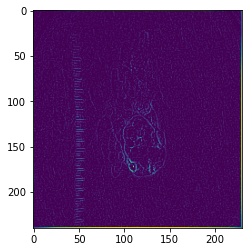

In [12]:
I = plt.imshow(mat_image_train[:, :, 5])
plt.show()

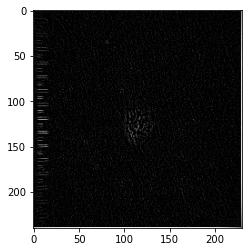

In [13]:
I = plt.imshow(mat_image_test[:, :, 5], cmap=plt.get_cmap('gray'))
plt.show()

nous utilisons les descripteurs suivants :

In [14]:
def rgb2gray(I):
    r, g, b = I[:, :, 0], I[:, :, 1], I[:, :, 2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray.astype(int)

In [15]:
def variance(I):
    nl, nc = I.shape
    m = np.mean(I)
    va = np.sum((I-m)**2)/(nl*nc)
    return va

In [16]:
def energie(I):
    en = np.sum(I**2)
    return en

In [17]:
def entropie(I):
    ent = -np.sum(I*np.log2(I+1e-10))
    return ent

In [18]:
def contraste(I):
    nl, nc = I.shape
    co = 0
    for i in range(nl):
        for j in range(nc):
            co += ((i-j)**2*(I[i, j]))
    return co

In [19]:
def homogenite(I):
    nl, nc = I.shape
    mo = 0
    for i in range(nl):
        for j in range(nc):
            mo += I[i, j]/(1+abs(i-j))
    return mo
def moy_color(img):
    vect_color=np.zeros(3)
    
    nl,nc,p=np.shape(img)
    vect_color=[((1/(nl*nc))*np.sum(img[:,:,i])) for i in range(p)]
    return np.array(vect_color)

In [20]:
def histo(I):
    [nl, nc] = np.shape(I)
    h = np.zeros(256)
    I_m = np.round(I)
    for i in range(0, nl):
        for j in range(0, nc):
            val = int(I_m[i][j])
            h[val] += 1
    return h
def matrice_co_nonSym(I):
        (l,c)=I.shape
        #m=np.max(I)(m+1,m+1)
        C=np.zeros((256, 256))
        for i in range(l):
            for j in range(c-1):
                    C[int(I[i,j]),int(I[i,j+1])]+=1
        return  C 

          Stocker_desc est la fonction qui stocke les valeurs du descripteur utilisé :
          
                 mat_desc_train = stocker_desc(mat_image_train)
                 mat_desc_test = stocker_desc(mat_image_test)


In [21]:
def stocker_desc(mat_image):
    nl, nc, nbr_img = mat_image.shape
    desc = np.zeros((nbr_img, 256))
    for i in tqdm(range(nbr_img)):
        val = mat_image[:, :, i]
        desc[i, :] =  histo(val)
    return desc

  Après on a normalisé les images stockées :

In [22]:
mat_desc_train = stocker_desc(mat_image_train)
mat_desc_test = stocker_desc(mat_image_test)

moy_train = np.mean(mat_desc_train)
ecart_train = np.sqrt(moy_train)
moy_test = np.mean(mat_desc_test)
ecart_test = np.sqrt(moy_test)

mat_desc_train = (mat_desc_train - moy_train) / ecart_train
mat_desc_test = (mat_desc_test - moy_test) / ecart_test

max_train = np.max(mat_desc_train)
max_test = np.max(mat_desc_test)

mat_desc_train = mat_desc_train / max_train
mat_desc_test = mat_desc_test / max_test

print(mat_desc_train)
print(mat_desc_test)


100%|██████████████████████████████████████████████████████████████████████████████| 5007/5007 [15:21<00:00,  5.43it/s]


[[ 0.80190647  0.05695898  0.05564572 ... -0.00643573 -0.00643573
  -0.00643573]
 [ 0.80993527  0.05609342  0.05501893 ... -0.00643573 -0.00643573
  -0.00643573]
 [ 0.81297965  0.07444923  0.07030052 ... -0.00640588 -0.00643573
  -0.00643573]
 ...
 [ 0.78960957  0.02415729  0.02463484 ... -0.00640588 -0.00643573
  -0.00536124]
 [ 0.7495551   0.02162031  0.02090399 ... -0.00643573 -0.00637603
  -0.00562986]
 [ 0.81005466  0.02920141  0.03030574 ... -0.00643573 -0.00643573
  -0.00643573]]
[[ 0.80405853  0.0522281   0.05128972 ... -0.00652709 -0.00652709
  -0.00652709]
 [ 0.79709629  0.04005933  0.03791012 ... -0.00652709 -0.00652709
  -0.00646655]
 [ 0.82567172  0.05900871  0.05625409 ... -0.00652709 -0.00652709
  -0.00643628]
 ...
 [ 0.8582126   0.05135026  0.04802049 ... -0.00652709 -0.00652709
  -0.00652709]
 [ 0.75135745  0.02020183  0.01914236 ... -0.00652709 -0.00646655
  -0.00449897]
 [ 0.83378424  0.04956429  0.0496551  ... -0.00652709 -0.00652709
  -0.00652709]]


In [23]:
np.sqrt(np.sum(mat_desc_train[1]-mat_desc_test[1])**2)

3.469446951953614e-17

Écrire une fonction distance_mat=stocke_dist(mat_desc_train, mat_desc_test, nbr_img) qui calcule la matrice 2D de distance et la stocke dans mat_dist.

In [24]:
def stocke_dist(mat_desc_train, mat_desc_test, nbr_img):
    distance_mat = np.zeros((nbr_img, nbr_img))
    for i in tqdm(range(0, nbr_img)):
        for j in range(0, nbr_img):
            distance_mat[i,j] = np.sqrt(np.sum(np.abs(mat_desc_train[j]-mat_desc_test[i])))
    return distance_mat
#distance_mat[i,j] = np.sqrt(np.sum(np.abs(mat_desc_train[j]-mat_desc_test[i])))=np.sum(abs(mat_desc_train[j]-mat_desc_test[i]))

In [25]:
nbr_img=5007
distance_mat=stocke_dist(mat_desc_train,mat_desc_test,nbr_img)

100%|██████████████████████████████████████████████████████████████████████████████| 5007/5007 [12:42<00:00,  6.57it/s]


In [26]:
distance_mat.shape

(5007, 5007)

In [28]:
mat_index = np.argsort(distance_mat, axis=1)
mat_index

array([[3808,  550,  430, ..., 3508,  622, 1264],
       [3682, 4652, 1244, ..., 1264,  622, 1731],
       [ 831,  632, 4798, ..., 3508,  622, 1264],
       ...,
       [ 616, 1279,   43, ..., 1263,  622, 1264],
       [3380, 1524, 1005, ..., 1735, 1736, 1731],
       [1201, 4610, 4738, ..., 3508,  622, 1264]], dtype=int64)

Écrire une fonction stock_pert(mat_index) qui calcule la matrice 2D rempla-
çant les indices des images pertinentes par 1 et 0 sinon

In [29]:
def stock_pert(mat_index):
        pert = np.zeros((nbr_img, nbr_img))
        k = 0
        zz = [
            [0, 326],
            [326, 840],
            [840, 1939],
            [1939, 2054],
            [2054, 3167],
            [3167, 9872],
            [9872, 10013]
        ]

        for i in zz:
            k += 1
            z1, z2 = i
            z1, z2 = z1 // 2, z2 // 2
            classe = mat_index[z1:z2, :]
            a = classe >= z1
            b = classe < z2
            pert[z1:z2, :] = a * b
            print(pert[z1:z2, 0].shape)
            print('Classe ' + str(k) + ' a une précision de : ' +
                  str(round(np.mean(pert[z1:z2, 0]) * 100, 2)) + '%')


        return pert

In [30]:
stock_pert(mat_index)

(163,)
Classe 1 a une précision de : 7.36%
(257,)
Classe 2 a une précision de : 10.12%
(549,)
Classe 3 a une précision de : 24.95%
(58,)
Classe 4 a une précision de : 8.62%
(556,)
Classe 5 a une précision de : 22.48%
(3353,)
Classe 6 a une précision de : 75.87%
(70,)
Classe 7 a une précision de : 2.86%


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [32]:
print(np.mean(stock_pert(mat_index)[:, 0]))

(163,)
Classe 1 a une précision de : 7.36%
(257,)
Classe 2 a une précision de : 10.12%
(549,)
Classe 3 a une précision de : 24.95%
(58,)
Classe 4 a une précision de : 8.62%
(556,)
Classe 5 a une précision de : 22.48%
(3353,)
Classe 6 a une précision de : 75.87%
(70,)
Classe 7 a une précision de : 2.86%
0.5694028360295587
